# Tahap Preprocessing

Preprocessing dilakukan dengan beberapa tahap, diantaranya yang digunakan adalah:


1.   Menghapus URL jika ditemukan
2.   Menghapus tanda baca
3.   Menghapus Stopwords (Bahasa Inggris)
4.   Case Folding menjadi huruf kecil
5.   Tokenization
6.   Membuat Dictionary Word Index
7.   Text to sequence
8.   Padding text



## Library

In [ ]:
import pandas as pd
import numpy as np
import math as m

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Class

### DatasetProcessing

In [ ]:
from sklearn.model_selection import train_test_split

class DatasetProcessing:

    def loadDataset(self, path):
        #Load dataset dari path yang ditentukan
        dataset = pd.read_csv(path)
        return dataset

    def applyLabel(self, dataset, label):
        #Menambahkan label untuk berita yang tidak memiliki label sebelumnya
        if label == 1:
            dataset['label'] = 1
        else:
            dataset['label'] = 0

        return dataset  

    def concatDataset(self, dataset, datasetToConcat):
        #Penggabungan 2 dataframe menjadi 1 dataframe menggunakan .concat, parameter = 2 dataframe
        concatenatedDataset = pd.concat([dataset, datasetToConcat]).reset_index(drop = True)

        return concatenatedDataset

    def getNewsLength(self, dataframe):
        #Mengambil panjang kata setiap teks berita pada dataframe
        sizes = []

        for text in dataframe['text']:
            text = str(text)
            len_ = len(text.split())
            sizes.append(len_)

        news_length = np.array(sizes)

        return news_length
    
    def removeDuplicate(self, dataset):
        news_count = len(dataset)
        print("Jumlah data keseluruhan  : ", news_count)

        duplicated = dataset[dataset.duplicated(['title', 'text', 'label'])]
        duplicated_news_count = len(duplicated)
        print("Jumlah data yang terduplikasi  : ", duplicated_news_count)

        dataset = dataset.drop_duplicates(['title', 'text', 'label'], keep='first')
        updated_news_count = len(dataset)
        print("Jumlah data setelah dihapus yang terduplikasi  : ", updated_news_count)

        return dataset

    def removeNull(self, dataset):
        news_count = len(dataset)
        print("Jumlah data keseluruhan  : ", news_count)

        updated_dataset = dataset.dropna(subset=['title', 'text', 'label'])
        updated_news_count = len(updated_dataset)
        news_count = news_count - updated_news_count
        print("Jumlah data yang memiliki null values  : ", news_count)
        print("Jumlah data setelah dihapus jika memiliki null values  : ", updated_news_count)

        return dataset

    def mergeNews(self, dataset):
        dataset = dataset.reset_index(drop = True)
        x = dataset['title'] + ' ' + dataset['text']
        y = dataset['label']

        return x, y

    def shuffleData(self, x, y):
        np.random.seed(42)

        x_data = np.array(x)
        y_data = y

        indices = np.arange(x_data.shape[0])
        np.random.shuffle(indices)
        x_data = x_data[indices]
        y_data = y_data[indices]

        return x_data, y_data

    def splitData(self, x, y, val, test):
        x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=val,random_state=42)
        x_train, x_test, y_train, y_test = train_test_split(x_train,y_train,test_size=test,random_state=42)

        print("Summary data splitting: ")
        print("X_train  : ", x_train.shape)
        print("y_train  : ", y_train.shape)
        print("X_Val    : ", x_val.shape)
        print("y_train  : ", y_val.shape)
        print("X_test   : ", x_test.shape)
        print("y_test   : ", y_test.shape)

        return x_train, y_train, x_val, y_val, x_test, y_test

    

### DatasetAnalysis

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

class DatasetAnalysis:

    def infoDataset(self, dataset):
        print("Dataset Information : ")
        dataset.info()

    def plotFrequency(self, dataset, len_limit=0):

        if len_limit != 0:
            dataset = dataset[dataset.len < len_limit]
        
        plt.rcParams.update({'figure.figsize':(12,5), 'figure.dpi':100})
        news_length = dataset['len']
        x = np.array(news_length)
        plt.hist(x, bins=50)
        plt.gca().set(title='Persebaran Jumlah Kata pada Berita', xlabel='Jumlah Kata', ylabel='Banyaknya Berita')

    def dataCount(self, dataset):
        count_fake = len(dataset[dataset['label'] == 1])
        count_true = len(dataset[dataset['label'] == 0])
        print("Total data pada berita Fake: ", count_fake)
        print("Total data pada berita Real: ", count_true)
        labels = ["Fake","True"]
        sizes = [count_fake, count_true]
        colors = ['lightcoral', 'lightskyblue']
        plt.pie(sizes, colors=colors, startangle=90, autopct='%1.1f%%', labels=labels, radius = 4)
        
        plt.axis('equal')
        plt.show()

### PickleManager

In [ ]:
import pickle

class PickleManager:
    def pickleSave(self, path, variable):
        new_path = path
        with open(new_path, 'wb') as f:
            pickle.dump(variable, f)
        f.close()
        print("Saved to path : ", new_path)

    def pickleLoad(self, path):
        new_path = path
        load_file = open(new_path, 'rb')
        loaded_file = pickle.load(load_file)

        return loaded_file

### TextCleaning

In [ ]:
# Preprocessing
class TextCleaning():
    def __init__(self):
        self.text = ""
        self.cleaned_text = []

    def removeUrl(self):
        #Penjelasan: Buang teks yang memiliki URL
        text_result = self.text.split(" ")
        self.text = ' '.join(
            [i 
            for i in text_result
              if 'http://' not in i
            ])
        return self.text

    def removeLineBreak(self):
        #Penjelasan: menghapus pemisah kalimat '\n' atau newline
        line_break = '\n'
        text_result = ""
        for character in self.text:
          if character not in line_break:
            text_result = text_result + character

        self.text = text_result
        return self.text

    def removePunctuation(self):
        #Penjelasan: Buang teks yang memiliki tanda baca
        punctuations = ['','!','(',')','-','[',']','{','}',';',':',"'",'"','`','/','<'
        ,'>','.','?','@','#','$','%','&','*','_','~','’','”','“', ',', '']

        text_result = ""
        for character in self.text:
          if character not in punctuations:
            text_result = text_result + character
        self.text = text_result
        return text_result

    def textLower(self):
        #Penjelasan: mengubah huruf teks menjadi huruf kecil semua
        self.text = self.text.lower()
        return self.text

    def removeStopwords(self):
        #Penjelasan: Membuang kata-kata yang tidak memiliki makna dari sebuah kalimat     
        stopwords_list = ['i','me','my','myself','we','our','ours','ourselves','you',
                          "you're","you've","you'll","you'd",'your','yours','yourself'
                          ,'yourselves','he','him','his','himself','she',"she's",'her'
                          ,'hers','herself','it',"it's",'its','itself','they','them',
                          'their','theirs','themselves','what','which','who','whom',
                          'this','that',"that'll",'these','those','am','is','are',
                          'was','were','be','been','being','have','has','had',
                          'having','do','does','did','doing','a','an','the','and',
                          'but','if','or','because','as','until','while','of','at',
                          'by','for','with','about','against','between','into',
                          'through','during','before','after','above','below','to',
                          'from','up','down','in','out','on','off','over','under',
                          'again','further','then','once','here','there','when',
                          'where','why','how','all','any','both','each','few','more',
                          'most','other','some','such','no','nor','not','only','own',
                          'same','so','than','too','very','s','t','can','will','just',
                          'don',"don't",'should',"should've",'now','d','ll','m','o',
                          're','ve','y','ain','aren',"aren't",'couldn',"couldn't",
                          'didn',"didn't",'doesn',"doesn't",'hadn',"hadn't",'hasn',
                          "hasn't",'haven',"haven't",'isn',"isn't",'ma','mightn',
                          "mightn't",'mustn',"mustn't",'needn',"needn't",'shan',
                          "shan't",'shouldn',"shouldn't",'wasn',"wasn't",'weren',
                          "weren't",'won',"won't",'wouldn',"wouldn't"]

        text_result = ""
        text = self.text.split()

        for word in text:
          if word not in stopwords_list:
            text_result = text_result + " " + word
        self.text = text_result
            
        return text_result
        
    def doClean(self, text):
        self.text = text
        self.text = self.removeUrl()
        self.text = self.removeLineBreak()
        self.text = self.removePunctuation()
        self.text = self.textLower()
        self.text = self.removeStopwords()

        return str(self.text.strip()).replace(" ", " ")

    def main(self, x):
        for line in x: 
            self.cleaned_text.append(self.doClean(line))
        
        return self.cleaned_text

    def newsLimiter(self, text, y, limit):
        updated_cleaned_text = []
        updated_y = []

        for i in range(len(text)):
            news_length = len(text[i].split())
            if news_length > limit:
                updated_cleaned_text.append(text[i])
                updated_y.append(y[i])

        return updated_cleaned_text, updated_y

### TextPreprocessing

In [ ]:
class TextPreprocessing:
    def __init__(self, word_index={}, pad_sequences=False):
        self.word_index = word_index
        self.unique_word = {}
        self.sequenced_text = []
        self.word_counted = []
        self.padded_sequences = []
        self.pad_sequences = pad_sequences

    def findUniqueWord(self, list_word):

        def takeSecond(elem):
            return elem[1]

        unique_word = {}
        for word in list_word:
            if word in unique_word:
                unique_word[word] +=1
            else:
                unique_word[word] = 1

        data = list(unique_word.items())
        data.sort(key=takeSecond, reverse=True)
        word_counted = np.array(data)
        self.word_counted = word_counted
        self.unique_word = unique_word

        return word_counted

    def wordIndexing(self, word):
        index=1
        word_index = {}

        for i in range(len(word)):
            word_index[word[i][0]] = index
            index = index + 1

        self.word_index = word_index
        return word_index

    def textToSequences(self, text):
        sequenced_text = []
        for i in range(len(text)):
            temp = text[i].split()
            indexed_sentences = []
            for word in temp:
                if word in self.word_index:
                    indexed_sentences.append(self.word_index[word])
            sequenced_text.append(indexed_sentences)

        self.sequenced_text = sequenced_text
        return sequenced_text

    def doTokenize(self, text):
        word_token = []

        for i in text:
            temp = i.split(" ")
            word_token = word_token + temp

        return word_token

    def main(self, text):
        #Kata yang tertoken tapi tidak unik
        word_token = self.doTokenize(text)

        #Token yang unik dengan jumlah
        word_counted = self.findUniqueWord(word_token)    

        #Token dijadikan index dictionary
        result = self.wordIndexing(word_counted)

        #Text berita diubah ke sequence based by word index
        result = self.textToSequences(text)

        if self.pad_sequences == True:
            result_padded = self.doPrePadded(result)

        return self.word_index, self.sequenced_text, self.word_counted, self.padded_sequences

    def doPrePadded(self, sequenced_text, maxlen=300):
        padded_sequences = []
        for news in sequenced_text:
            news_to_check = news
            news_length = len(news)
            if news_length < maxlen:
                zeros = [0]*(maxlen-news_length)
                padded_news = zeros + news
            else:
                padded_news = news[:maxlen]
            padded_sequences.append(padded_news)
        self.padded_sequences = padded_sequences

        return self.padded_sequences

### Embedding

In [ ]:
class Embedding:
    def __init__(self, word_index):
        self.embedding_matrix = []
        self.word_index = word_index

    def getGlove(self, dim):
        EMBEDDING_DIM = dim
        GLOVE_DIR = 'drive/MyDrive/Tugas Akhir/Program/Glove/glove.6B.'+str(EMBEDDING_DIM)+'d.txt'

        embeddings_index = {}
        f = open(GLOVE_DIR, encoding='utf8')
        print('Loading Glove from:', GLOVE_DIR,'…', end='')
        for line in f:
            values = line.split()
            word = values[0]
            embeddings_index[word] = np.asarray(values[1:], dtype='float32')
        f.close()
        print('Done.\n Proceeding with Embedding Matrix…', end='')
                                                
        self.embedding_matrix = np.zeros((len(self.word_index) + 1, EMBEDDING_DIM))
        missing_embedding = 0
                                                
        for word, i in self.word_index.items():
            embedding_vector = embeddings_index.get(word)
            if embedding_vector is not None:
                self.embedding_matrix[i] = embedding_vector
            else:
                missing_embedding += 1

        print("Missing Embedding from Glove: ", missing_embedding)
        return self.embedding_matrix

## Import Dataset

In [ ]:
path_datafake = "drive/MyDrive/Tugas Akhir/Program/Dataset/Fake.csv"
path_datatrue = "drive/MyDrive/Tugas Akhir/Program/Dataset/True.csv"

## Process Dataset

In [ ]:
process_dataset = DatasetProcessing()

In [ ]:
df_fake = process_dataset.loadDataset(path_datafake)
df_fake = process_dataset.applyLabel(df_fake, 1)
df_fake['len'] = process_dataset.getNewsLength(df_fake)

df_true = process_dataset.loadDataset(path_datatrue)
df_true = process_dataset.applyLabel(df_true, 0)
df_true['len'] = process_dataset.getNewsLength(df_true)

In [ ]:
df_dataset = process_dataset.concatDataset(df_fake, df_true)

## Analisa Dataset

In [ ]:
analyze_dataset = DatasetAnalysis()

### Informasi Dataset

In [ ]:
analyze_dataset.infoDataset(df_dataset)

Dataset Information : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
 5   len      44898 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 2.1+ MB


### Preview Dataset

In [ ]:
df_dataset.head()

title  ...  len
0   Donald Trump Sends Out Embarrassing New Year’...  ...  495
1   Drunk Bragging Trump Staffer Started Russian ...  ...  305
2   Sheriff David Clarke Becomes An Internet Joke...  ...  580
3   Trump Is So Obsessed He Even Has Obama’s Name...  ...  444
4   Pope Francis Just Called Out Donald Trump Dur...  ...  420

[5 rows x 6 columns]

In [ ]:
df_dataset.tail()

title  ...  len
44893  'Fully committed' NATO backs new U.S. approach...  ...  466
44894  LexisNexis withdrew two products from Chinese ...  ...  125
44895  Minsk cultural hub becomes haven from authorities  ...  320
44896  Vatican upbeat on possibility of Pope Francis ...  ...  205
44897  Indonesia to buy $1.14 billion worth of Russia...  ...  210

[5 rows x 6 columns]

In [ ]:
df_dataset

title  ...  len
0       Donald Trump Sends Out Embarrassing New Year’...  ...  495
1       Drunk Bragging Trump Staffer Started Russian ...  ...  305
2       Sheriff David Clarke Becomes An Internet Joke...  ...  580
3       Trump Is So Obsessed He Even Has Obama’s Name...  ...  444
4       Pope Francis Just Called Out Donald Trump Dur...  ...  420
...                                                  ...  ...  ...
44893  'Fully committed' NATO backs new U.S. approach...  ...  466
44894  LexisNexis withdrew two products from Chinese ...  ...  125
44895  Minsk cultural hub becomes haven from authorities  ...  320
44896  Vatican upbeat on possibility of Pope Francis ...  ...  205
44897  Indonesia to buy $1.14 billion worth of Russia...  ...  210

[44898 rows x 6 columns]

### Persebaran Dataset

In [ ]:
news_to_analyze = df_dataset

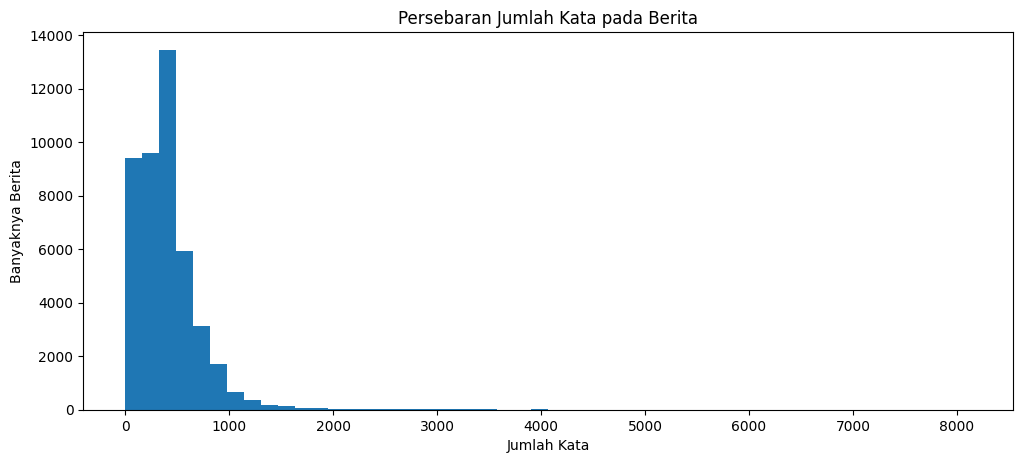

In [ ]:
analyze_dataset.plotFrequency(news_to_analyze)

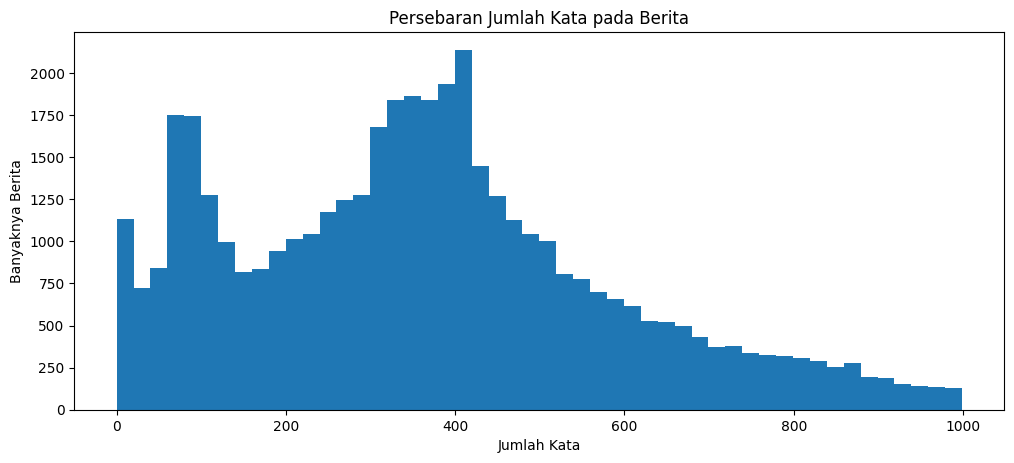

In [ ]:
analyze_dataset.plotFrequency(news_to_analyze, 1000)

In [ ]:
news_to_process = news_to_analyze

#### Hapus data yang duplikat

In [ ]:
#Hapus data yang duplikat
print("Jumlah data keseluruhan: ", len(news_to_process))

Jumlah data keseluruhan:  44898


In [ ]:
dataset_temp = process_dataset.removeDuplicate(news_to_process)

Jumlah data keseluruhan  :  44898
Jumlah data yang terduplikasi  :  5793
Jumlah data setelah dihapus yang terduplikasi  :  39105


In [ ]:
dataset_temp = process_dataset.removeNull(dataset_temp)

Jumlah data keseluruhan  :  39105
Jumlah data yang memiliki null values  :  0
Jumlah data setelah dihapus jika memiliki null values  :  39105


#### Persebaran Data

Total data pada berita Fake:  17908
Total data pada berita Real:  21197


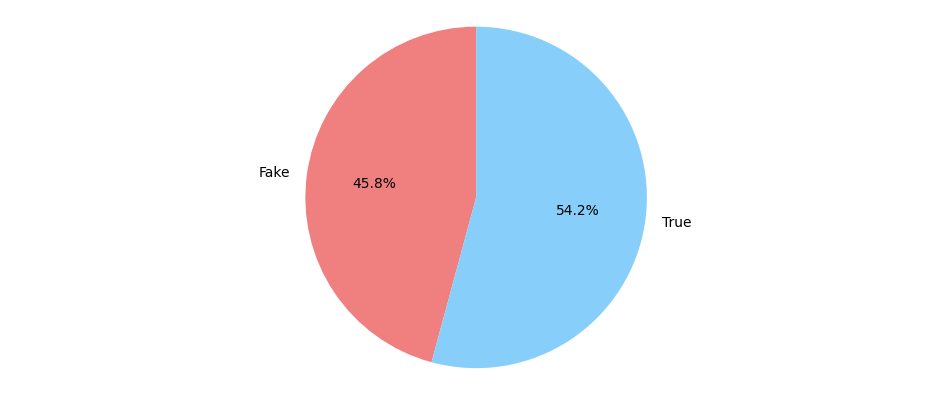

In [ ]:
analyze_dataset.dataCount(dataset_temp)

### Contoh unutk Teks Uji

In [ ]:
x_uji, y_uji = process_dataset.mergeNews(dataset_temp)

In [ ]:
y_uji = np.array(y_uji)
new_x, new_y = process_dataset.shuffleData(x_uji, y_uji)
x_train_uji, y_train_uji, x_val_uji, y_val_uji, x_test_uji, y_test_uji = process_dataset.splitData(new_x, new_y, 0.2, 0.25)

Summary data splitting: 
X_train  :  (23463,)
y_train  :  (23463,)
X_Val    :  (7821,)
y_train  :  (7821,)
X_test   :  (7821,)
y_test   :  (7821,)


In [ ]:
x_test_uji[1]

' BREAKING: RNC Pulls Funding For Trump — Is It All Over? A major indicator that Donald Trump s campaign might be over just occurred. The Republican National Committee has put a temporary halt on their program aimed at getting Trump into the White House. According to an email obtained by Politico, at least one top vendor in what is called the  Victory  program and one official at the RNC are named in the email s cc line.  Politico reports: In an email from the RNC to a victory program mail vendor, with the subject line  Hold on all projects,  the committee asked the vendor to  put a hold  on mail production.   Please put a hold/stop on all mail projects right now. If something is in production or print it needs to stop. Will update you when to proceed,  Lauren Toomey, a staffer in the RNC s political department, wrote in an email that was obtained by POLITICO. Officials with the RNC have yet to release a statement on the matter.This, of course, comes after an audio recording was releas

In [ ]:
y_test_uji[1]

1

### Menggabungkan Title dan Text berita
Referensi: https://www.sciencedirect.com/science/article/pii/S1877050920300806

In [ ]:
x, y = process_dataset.mergeNews(dataset_temp)

## Preprocessing

In [ ]:
y = np.array(y)
new_x, new_y = process_dataset.shuffleData(x, y)
x_train, y_train, x_val, y_val, x_test, y_test = process_dataset.splitData(new_x, new_y, 0.2, 0.25)

Summary data splitting: 
X_train  :  (23463,)
y_train  :  (23463,)
X_Val    :  (7821,)
y_train  :  (7821,)
X_test   :  (7821,)
y_test   :  (7821,)


In [ ]:
x_test[2000]

'Defense, finance, telecoms donated heavily to Trump inauguration: U.S. filing WASHINGTON (Reuters) - Large U.S. companies and their executives helped President Donald Trump raise a record-setting $106.7 million for inauguration festivities in January, according to a U.S. government filing released on Wednesday. That tally more than doubled the prior 2009 record of $53.2 million for President Barack Obama’s first inauguration, which had topped the previous 2005 record of $42.3 million for President George W. Bush, government records showed. The biggest donor by far to Trump’s inauguration was Sheldon Adelson, casino magnate and founder of Las Vegas Sands Corp (LVS.N). He gave $5 million, according to the 58th Presidential Inaugural Committee’s filing with the Federal Election Commission. Adelson declined comment.  Many of the companies that donated to Trump, a Republican, have significant matters pending before the U.S. government or have been invited to White House events. Many of the

In [ ]:
y_test[2000]

0

### Text Cleaning

In [ ]:
text_cleaning = TextCleaning()

In [ ]:
cleaned_text = text_cleaning.main(x)

#### Preview

##### Before

In [ ]:
x[0]

' Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this 

##### After

In [ ]:
cleaned_text[0]

'donald trump sends embarrassing new years eve message disturbing donald trump wish americans happy new year leave instead give shout enemies haters dishonest fake news media former reality show star one job country rapidly grows stronger smarter want wish friends supporters enemies haters even dishonest fake news media happy healthy new year president angry pants tweeted 2018 great year america country rapidly grows stronger smarter want wish friends supporters enemies haters even dishonest fake news media happy healthy new year 2018 great year america donald j trump realdonaldtrump december 31 2017trump tweet went welll expectwhat kind president sends new year greeting like despicable petty infantile gibberish trump lack decency even allow rise gutter long enough wish american citizens happy new year bishop talbert swan talbertswan december 31 2017no one likes calvin calvinstowell december 31 2017your impeachment would make 2018 great year america also accept regaining control congre

Text Limiter untuk Pengujian panjang berita

In [ ]:
cleaned_text_25, y_25 = text_cleaning.newsLimiter(cleaned_text, y, 25)

In [ ]:
print("Jumlah berita: ", len(cleaned_text_25), "Jumlah label: ", len(y_25))

Jumlah berita:  38114 Jumlah label:  38114


In [ ]:
cleaned_text_50, y_50 = text_cleaning.newsLimiter(cleaned_text, y, 50)

In [ ]:
print("Jumlah berita: ", len(cleaned_text_50), "Jumlah label: ", len(y_50))

Jumlah berita:  36365 Jumlah label:  36365


In [ ]:
cleaned_text_100, y_100 = text_cleaning.newsLimiter(cleaned_text, y, 100)

In [ ]:
print("Jumlah berita: ", len(cleaned_text_100), "Jumlah label: ", len(y_100))

Jumlah berita:  31204 Jumlah label:  31204


### Data Shuffling and Splitting

Panjang Berita limit = 0

In [ ]:
y = np.array(y)
new_x, new_y = process_dataset.shuffleData(cleaned_text, y)
x_train, y_train, x_val, y_val, x_test, y_test = process_dataset.splitData(new_x, new_y, 0.2, 0.25)

Summary data splitting: 
X_train  :  (23463,)
y_train  :  (23463,)
X_Val    :  (7821,)
y_train  :  (7821,)
X_test   :  (7821,)
y_test   :  (7821,)


In [ ]:
x_test[5]

'donald trump vows start administration vacation internet erupts donald trump officially assumes office president friday says leaving oval office chair empty monday according trump spend weekend partying instead presidentingin interview times london trump said one first orders gonna sign day one consider monday opposed friday saturday right mean day one gonna monday want signing get mixed lots celebration one first orders gonna signing gonna strong borders note man said president obama reported today played 250 rounds golf going hawaii think say three weeks trump said two hundred fifty rounds guy plays pga tour plays played golf last year tiger woods time work 250 rounds might sound like lot eight years amounts less one round every 10 days historically though 250 rounds tiny blip woodrow wilson played nearly 1200 rounds administration george w bush obama beat vacation timetrump announcement probably sit well sycophants whose hopes hung 21 things promised day one day three day four one 

Panjang Berita limit = 25

In [ ]:
y_25 = np.array(y_25)
new_x_25, new_y_25 = process_dataset.shuffleData(cleaned_text_25, y_25)
x_train, y_train, x_val, y_val, x_test, y_test = process_dataset.splitData(new_x_25, new_y_25, 0.2, 0.25)

Summary data splitting: 
X_train  :  (22868,)
y_train  :  (22868,)
X_Val    :  (7623,)
y_train  :  (7623,)
X_test   :  (7623,)
y_test   :  (7623,)


Panjang Berita limit = 50

In [ ]:
y_50 = np.array(y_50)
new_x_50, new_y_50 = process_dataset.shuffleData(cleaned_text_50, y_50)
x_train, y_train, x_val, y_val, x_test, y_test = process_dataset.splitData(new_x_50, new_y_50, 0.2, 0.25)

Summary data splitting: 
X_train  :  (21819,)
y_train  :  (21819,)
X_Val    :  (7273,)
y_train  :  (7273,)
X_test   :  (7273,)
y_test   :  (7273,)


Panjang Berita limit = 100

In [ ]:
y_100 = np.array(y_100)
new_x_100, new_y_100 = process_dataset.shuffleData(cleaned_text_100, y_100)
x_train, y_train, x_val, y_val, x_test, y_test = process_dataset.splitData(new_x_100, new_y_100, 0.2, 0.25)

Summary data splitting: 
X_train  :  (18722,)
y_train  :  (18722,)
X_Val    :  (6241,)
y_train  :  (6241,)
X_test   :  (6241,)
y_test   :  (6241,)


## Length 0

### Text Preprocessing

In [ ]:
text_tokenize = TextPreprocessing(pad_sequences=True) #default 300
word_index, sequenced_text, word_counted, padded_sequences = text_tokenize.main(x_train)

#### Hasil Preprocessing

##### Before

In [ ]:
cleaned_text[0]

'donald trump sends embarrassing new years eve message disturbing donald trump wish americans happy new year leave instead give shout enemies haters dishonest fake news media former reality show star one job country rapidly grows stronger smarter want wish friends supporters enemies haters even dishonest fake news media happy healthy new year president angry pants tweeted 2018 great year america country rapidly grows stronger smarter want wish friends supporters enemies haters even dishonest fake news media happy healthy new year 2018 great year america donald j trump realdonaldtrump december 31 2017trump tweet went welll expectwhat kind president sends new year greeting like despicable petty infantile gibberish trump lack decency even allow rise gutter long enough wish american citizens happy new year bishop talbert swan talbertswan december 31 2017no one likes calvin calvinstowell december 31 2017your impeachment would make 2018 great year america also accept regaining control congre

##### After

In [ ]:
sequenced_text[0]

[2,
 327,
 292,
 2197,
 552,
 3,
 2740,
 535,
 244,
 33,
 8,
 2,
 69,
 147,
 72,
 94,
 15700,
 56,
 68,
 307,
 147,
 383,
 1808,
 552,
 3,
 3921,
 1846,
 6993,
 2740,
 535,
 1332,
 386,
 1,
 244,
 631,
 97,
 142,
 13,
 471,
 1129,
 509,
 121,
 631,
 1990,
 124,
 5756,
 2068,
 1383,
 3,
 147,
 575,
 1982,
 17397,
 877,
 1652,
 335,
 10995,
 11146,
 147,
 111,
 575,
 61,
 17910,
 9,
 1695,
 283,
 1,
 2068,
 21,
 244,
 7417,
 1973,
 69,
 102,
 5935,
 1165,
 2197,
 21132,
 149,
 653,
 29,
 7092,
 2886,
 142,
 5108,
 627,
 197,
 69,
 2325,
 10326,
 95,
 2962,
 1725,
 2197,
 21132,
 17910,
 1,
 11147,
 3963,
 9116,
 7701,
 1100,
 4093,
 233,
 1230,
 4455,
 138,
 269,
 3564,
 3583,
 11147,
 3828,
 2387,
 2192,
 1044,
 6498,
 14693,
 111,
 19664,
 63,
 95,
 5,
 12,
 2,
 188,
 17911,
 2197,
 11628,
 578,
 2569,
 427,
 386,
 1571,
 2510,
 147,
 1986,
 1636,
 14693,
 9208,
 3,
 147,
 5977,
 244,
 1,
 2068,
 17397,
 1260,
 2259,
 2720,
 6617,
 53,
 1578,
 299,
 3,
 552,
 8027,
 7634,
 1687,
 428,


In [ ]:
padded_sequences[0]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 327,
 292,
 2197,
 552,
 3,
 2740,
 535,
 244,
 33,
 8,
 2,
 69,
 147,
 72,
 94,
 15700,
 56,
 68,
 307,
 147,
 383,
 1808,
 552,
 3,
 3921,
 1846,
 6993,
 2740,
 535,
 1332,
 386,
 1,
 244,
 631,
 97,
 142,
 13,
 471,
 1129,
 509,
 121,
 631,
 1990,
 124,
 5756,
 2068,
 1383,
 3,
 147,
 575,
 1982,
 17397,
 877,
 1652,
 335,
 10995,
 11146,
 147,
 111,
 575,
 61,
 17910,
 9,
 1695,
 283,
 1,
 2068,
 21,
 244,
 7417,
 1973,
 69,
 102,
 5935,
 1165,
 2197,
 21132,
 149,
 653,
 29,
 7092,
 2886,
 142,
 5108,
 627,
 197,
 69,
 2325,
 10326,
 95,
 2962,
 1725,
 2197,
 21132,
 17910,
 1,
 11147,
 3963,
 9116,
 7701,
 1100,
 4093,
 233,
 1230,
 4455,
 138,
 269,
 3564,
 3583,
 11147,
 3828,
 2387,
 2192,
 1044,
 6498,
 14693,
 111,
 19664,
 63,
 95,
 5,
 12,
 2,
 188,
 17911,
 2197,
 11628,
 578,
 2569,
 427,
 386,
 1571,
 25

#### Word Index

In [ ]:
print('Word Indexed : ' + str(len(word_index)))

Word Indexed : 168234


In [ ]:
word_index

{'said': 1,
 'trump': 2,
 'us': 3,
 'would': 4,
 'president': 5,
 'people': 6,
 'one': 7,
 'reuters': 8,
 'new': 9,
 'state': 10,
 'also': 11,
 'donald': 12,
 'house': 13,
 'states': 14,
 'republican': 15,
 'government': 16,
 'could': 17,
 'clinton': 18,
 'obama': 19,
 'united': 20,
 'told': 21,
 'white': 22,
 'campaign': 23,
 'like': 24,
 'last': 25,
 'election': 26,
 'two': 27,
 'party': 28,
 'time': 29,
 'first': 30,
 'news': 31,
 'former': 32,
 'washington': 33,
 'even': 34,
 'year': 35,
 'country': 36,
 'years': 37,
 'security': 38,
 'trumps': 39,
 'may': 40,
 'republicans': 41,
 'many': 42,
 'say': 43,
 'video': 44,
 'national': 45,
 'law': 46,
 'percent': 47,
 'court': 48,
 'hillary': 49,
 'political': 50,
 'make': 51,
 'made': 52,
 'get': 53,
 'presidential': 54,
 'since': 55,
 'north': 56,
 'going': 57,
 'senate': 58,
 'media': 59,
 'police': 60,
 'bill': 61,
 'says': 62,
 'vote': 63,
 'support': 64,
 'democratic': 65,
 'back': 66,
 'russia': 67,
 'american': 68,
 'administrat

In [ ]:
my_pickle = PickleManager()

Save Word Index

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/word_index', word_index)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/word_index


Save Padded Sequence variance (150, 300, 450, 600) - word_index_0

Padded Sequence 150

In [ ]:
custom1_preprocess = TextPreprocessing(word_index)

In [ ]:
x_train_150 = custom1_preprocess.doPrePadded(sequenced_text, maxlen=150)
x_train_150 = np.array(x_train_150)

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_150', x_train_150)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_150


In [ ]:
x_val_150 = custom1_preprocess.textToSequences(x_val)
x_val_150 = custom1_preprocess.doPrePadded(x_val_150, maxlen=150)
x_val_150 = np.array(x_val_150)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_150', x_val_150)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_150


In [ ]:
x_test_150 = custom1_preprocess.textToSequences(x_test)
x_test_150 = custom1_preprocess.doPrePadded(x_test_150, maxlen=150)
x_test_150 = np.array(x_test_150)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_150', x_test_150)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_150


Padded Sequence 300

In [ ]:
x_train_300 = padded_sequences
x_train_300 = np.array(x_train_300)

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_300', x_train_300)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_300


In [ ]:
x_val_300 = custom1_preprocess.textToSequences(x_val)
x_val_300 = custom1_preprocess.doPrePadded(x_val_300, maxlen=300)
x_val_300 = np.array(x_val_300)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_300', x_val_300)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_300


In [ ]:
x_test_300 = custom1_preprocess.textToSequences(x_test)
x_test_300 = custom1_preprocess.doPrePadded(x_test_300, maxlen=300)
x_test_300 = np.array(x_test_300)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_300', x_test_300)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_300


Padded Sequence 450

In [ ]:
x_train_450 = custom1_preprocess.doPrePadded(sequenced_text, maxlen=450)
x_train_450 = np.array(x_train_450)

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_450', x_train_450)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_450


In [ ]:
x_val_450 = custom1_preprocess.textToSequences(x_val)
x_val_450 = custom1_preprocess.doPrePadded(x_val_450, maxlen=450)
x_val_450 = np.array(x_val_450)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_450', x_val_450)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_450


In [ ]:
x_test_450 = custom1_preprocess.textToSequences(x_test)
x_test_450 = custom1_preprocess.doPrePadded(x_test_450, maxlen=450)
x_test_450 = np.array(x_test_450)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_450', x_test_450)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_450


Padded Sequence 600

In [ ]:
x_train_600 = custom1_preprocess.doPrePadded(sequenced_text, maxlen=600)
x_train_600 = np.array(x_train_600)

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_600', x_train_600)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_600


In [ ]:
x_val_600 = custom1_preprocess.textToSequences(x_val)
x_val_600 = custom1_preprocess.doPrePadded(x_val_600, maxlen=600)
x_val_600 = np.array(x_val_600)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_600', x_val_600)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_600


In [ ]:
x_test_600 = custom1_preprocess.textToSequences(x_test)
x_test_600 = custom1_preprocess.doPrePadded(x_test_600, maxlen=600)
x_test_600 = np.array(x_test_600)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_600', x_test_600)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_600


Y variable to save

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/y_train', y_train)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/y_train


In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/y_val', y_val)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/y_val


In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/y_test', y_test)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/y_test


### Glove Embedding

Glove 100D

In [ ]:
embedder = Embedding(word_index)
embedding_matrix_100 = embedder.getGlove(100)

Loading Glove from: drive/MyDrive/Tugas Akhir/Program/Glove/glove.6B.100d.txt …Done.
 Proceeding with Embedding Matrix…Missing Embedding from Glove:  101535


In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/glove_100d', embedding_matrix_100)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/glove_100d


## Length 25

### Text Preprocessing

In [ ]:
text_tokenize = TextPreprocessing(pad_sequences=True) #default 300
word_index, sequenced_text, word_counted, padded_sequences = text_tokenize.main(x_train)

#### Hasil Preprocessing

##### Before

In [ ]:
cleaned_text[0]

'donald trump sends embarrassing new years eve message disturbing donald trump wish americans happy new year leave instead give shout enemies haters dishonest fake news media former reality show star one job country rapidly grows stronger smarter want wish friends supporters enemies haters even dishonest fake news media happy healthy new year president angry pants tweeted 2018 great year america country rapidly grows stronger smarter want wish friends supporters enemies haters even dishonest fake news media happy healthy new year 2018 great year america donald j trump realdonaldtrump december 31 2017trump tweet went welll expectwhat kind president sends new year greeting like despicable petty infantile gibberish trump lack decency even allow rise gutter long enough wish american citizens happy new year bishop talbert swan talbertswan december 31 2017no one likes calvin calvinstowell december 31 2017your impeachment would make 2018 great year america also accept regaining control congre

##### After

In [ ]:
sequenced_text[0]

[3495,
 293,
 974,
 728,
 3,
 85,
 59,
 33,
 9,
 16,
 159,
 5763,
 1077,
 85,
 59,
 5,
 13,
 2,
 2587,
 152,
 35,
 4461,
 3,
 12,
 459,
 60,
 130,
 6648,
 2270,
 27,
 7363,
 291,
 664,
 751,
 130,
 690,
 60,
 59,
 8985,
 3158,
 1394,
 312,
 243,
 11,
 318,
 432,
 19082,
 3955,
 1997,
 3308,
 187,
 588,
 12,
 59,
 951,
 8067,
 3955,
 159,
 2731,
 4,
 377,
 60,
 18,
 752,
 12,
 59,
 26950,
 826,
 1139,
 1097,
 85,
 1638,
 273,
 2955,
 155,
 846,
 10929,
 47,
 60,
 1452,
 2955,
 826,
 10647,
 3599,
 155,
 846,
 23008,
 47,
 8986,
 891,
 12,
 291,
 9817,
 753,
 47,
 85,
 846,
 625,
 47,
 8986,
 180,
 1097,
 2137,
 2045,
 47,
 10648,
 1139,
 1677,
 1638,
 12,
 7925,
 1997,
 2785,
 532,
 4,
 329,
 1423,
 1139,
 85,
 1638,
 1097,
 60,
 59,
 2087,
 8986,
 1097,
 1139,
 277,
 23009,
 3733,
 1265,
 47,
 8986,
 1097,
 60,
 1452,
 2092,
 532,
 24160,
 158,
 3733,
 1097,
 399,
 6871,
 1277,
 35,
 5348,
 2507,
 1399,
 8986,
 891,
 647,
 7255,
 295,
 2372,
 88,
 2314,
 26951,
 67,
 180,
 7811,
 31063

In [ ]:
padded_sequences[0]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3495,
 293,
 974,
 728,
 3,
 85,
 59,
 33,
 9,
 16,
 159,
 5763,
 1077,
 85,
 59,
 5,
 13,
 2,
 2587,
 152,
 35,
 4461,
 3,
 12,
 459,
 60,
 130,
 6648,
 2270,
 27,
 7363,
 291,
 664,
 751,
 130,
 690,
 60,
 59,
 8985,
 3158,
 1394,
 312,
 243,
 11,
 318,
 432,
 19082,
 3955,
 1997,
 3308,
 187,
 588,
 12,
 59,
 951,
 8067,
 3955,
 159,
 2731,
 4,
 377,
 60,
 18,
 752,
 12,
 59,
 26950,
 826,
 1139,
 1097,
 85,
 1638,
 273,
 2955,
 155,
 846,
 10929,
 47,
 60,
 1452,
 2955,
 826,
 10647,
 3599,
 155,
 846,
 23008,
 47,
 8986,
 891,
 12,
 291,
 9817,
 753,
 47,
 85,
 846,
 625,
 47,
 8986,
 180,
 1097,
 2137,
 2045,
 47,
 10648,
 1139,
 1677,
 1638,
 12,
 7925,
 1997,
 2785,
 532,
 4,
 329,
 1423,
 1139,
 85,
 1638,
 1097,
 60,
 59,
 2087,
 8986,
 1097,
 1139,
 277,
 23009,
 3733,
 1265,
 47,
 8986,
 1097,
 60,
 1452,
 2092,
 532,
 24160,
 158,
 3733,
 1097,
 399,
 6871,
 1277,
 35,
 5348,
 2507,
 1399,
 8986,
 891,
 647,
 725

#### Word Index

In [ ]:
print('Word Indexed : ' + str(len(word_index)))

Word Indexed : 168114


In [ ]:
word_index

{'said': 1,
 'trump': 2,
 'us': 3,
 'would': 4,
 'president': 5,
 'people': 6,
 'one': 7,
 'new': 8,
 'reuters': 9,
 'state': 10,
 'also': 11,
 'house': 12,
 'donald': 13,
 'states': 14,
 'government': 15,
 'republican': 16,
 'clinton': 17,
 'could': 18,
 'obama': 19,
 'united': 20,
 'told': 21,
 'white': 22,
 'campaign': 23,
 'like': 24,
 'election': 25,
 'last': 26,
 'two': 27,
 'party': 28,
 'time': 29,
 'news': 30,
 'first': 31,
 'former': 32,
 'washington': 33,
 'even': 34,
 'year': 35,
 'country': 36,
 'years': 37,
 'security': 38,
 'may': 39,
 'many': 40,
 'say': 41,
 'republicans': 42,
 'trumps': 43,
 'court': 44,
 'national': 45,
 'hillary': 46,
 'percent': 47,
 'since': 48,
 'made': 49,
 'make': 50,
 'presidential': 51,
 'north': 52,
 'get': 53,
 'law': 54,
 'political': 55,
 'video': 56,
 'going': 57,
 'police': 58,
 'bill': 59,
 'senate': 60,
 'media': 61,
 'democratic': 62,
 'russia': 63,
 'support': 64,
 'says': 65,
 'back': 66,
 'american': 67,
 'vote': 68,
 'week': 69,


In [ ]:
my_pickle = PickleManager()

Save Word Index

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/word_index', word_index)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/word_index


Save Padded Sequence variance (150, 300, 450, 600) - word_index_0

Padded Sequence 150

In [ ]:
custom1_preprocess = TextPreprocessing(word_index)

In [ ]:
x_train_150 = custom1_preprocess.doPrePadded(sequenced_text, maxlen=150)
x_train_150 = np.array(x_train_150)

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_150', x_train_150)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_150


In [ ]:
x_val_150 = custom1_preprocess.textToSequences(x_val)
x_val_150 = custom1_preprocess.doPrePadded(x_val_150, maxlen=150)
x_val_150 = np.array(x_val_150)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_150', x_val_150)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_150


In [ ]:
x_test_150 = custom1_preprocess.textToSequences(x_test)
x_test_150 = custom1_preprocess.doPrePadded(x_test_150, maxlen=150)
x_test_150 = np.array(x_test_150)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_150', x_test_150)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_150


Padded Sequence 300

In [ ]:
x_train_300 = padded_sequences
x_train_300 = np.array(x_train_300)

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_300', x_train_300)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_300


In [ ]:
x_val_300 = custom1_preprocess.textToSequences(x_val)
x_val_300 = custom1_preprocess.doPrePadded(x_val_300, maxlen=300)
x_val_300 = np.array(x_val_300)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_300', x_val_300)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_300


In [ ]:
x_test_300 = custom1_preprocess.textToSequences(x_test)
x_test_300 = custom1_preprocess.doPrePadded(x_test_300, maxlen=300)
x_test_300 = np.array(x_test_300)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_300', x_test_300)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_300


Padded Sequence 450

In [ ]:
x_train_450 = custom1_preprocess.doPrePadded(sequenced_text, maxlen=450)
x_train_450 = np.array(x_train_450)

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_450', x_train_450)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_450


In [ ]:
x_val_450 = custom1_preprocess.textToSequences(x_val)
x_val_450 = custom1_preprocess.doPrePadded(x_val_450, maxlen=450)
x_val_450 = np.array(x_val_450)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_450', x_val_450)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_450


In [ ]:
x_test_450 = custom1_preprocess.textToSequences(x_test)
x_test_450 = custom1_preprocess.doPrePadded(x_test_450, maxlen=450)
x_test_450 = np.array(x_test_450)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_450', x_test_450)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_450


Padded Sequence 600

In [ ]:
x_train_600 = custom1_preprocess.doPrePadded(sequenced_text, maxlen=600)
x_train_600 = np.array(x_train_600)

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_600', x_train_600)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_600


In [ ]:
x_val_600 = custom1_preprocess.textToSequences(x_val)
x_val_600 = custom1_preprocess.doPrePadded(x_val_600, maxlen=600)
x_val_600 = np.array(x_val_600)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_600', x_val_600)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_600


In [ ]:
x_test_600 = custom1_preprocess.textToSequences(x_test)
x_test_600 = custom1_preprocess.doPrePadded(x_test_600, maxlen=600)
x_test_600 = np.array(x_test_600)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_600', x_test_600)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_600


Y variable to save

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/y_train', y_train)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/y_train


In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/y_val', y_val)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/y_val


In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/y_test', y_test)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/y_test


### Glove Embedding

Glove 100D

In [ ]:
embedder = Embedding(word_index)
embedding_matrix_100 = embedder.getGlove(100)

Loading Glove from: drive/MyDrive/Tugas Akhir/Program/Glove/glove.6B.100d.txt …Done.
 Proceeding with Embedding Matrix…Missing Embedding from Glove:  101019


In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/glove_100d', embedding_matrix_100)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/glove_100d


## Length 50

### Text Preprocessing

In [ ]:
text_tokenize = TextPreprocessing(pad_sequences=True) #default 300
word_index, sequenced_text, word_counted, padded_sequences = text_tokenize.main(x_train)

#### Hasil Preprocessing

##### Before

In [ ]:
cleaned_text[0]

'donald trump sends embarrassing new years eve message disturbing donald trump wish americans happy new year leave instead give shout enemies haters dishonest fake news media former reality show star one job country rapidly grows stronger smarter want wish friends supporters enemies haters even dishonest fake news media happy healthy new year president angry pants tweeted 2018 great year america country rapidly grows stronger smarter want wish friends supporters enemies haters even dishonest fake news media happy healthy new year 2018 great year america donald j trump realdonaldtrump december 31 2017trump tweet went welll expectwhat kind president sends new year greeting like despicable petty infantile gibberish trump lack decency even allow rise gutter long enough wish american citizens happy new year bishop talbert swan talbertswan december 31 2017no one likes calvin calvinstowell december 31 2017your impeachment would make 2018 great year america also accept regaining control congre

##### After

In [ ]:
sequenced_text[0]

[3,
 100,
 862,
 10365,
 8187,
 248,
 783,
 33,
 11,
 3,
 126,
 9,
 1948,
 662,
 547,
 9,
 18952,
 6700,
 16901,
 96,
 1309,
 4478,
 4339,
 10365,
 8187,
 248,
 783,
 20,
 14,
 100,
 9,
 98,
 1,
 662,
 6700,
 2037,
 151,
 2014,
 11792,
 2404,
 2125,
 5341,
 4553,
 27,
 162,
 148,
 33,
 1309,
 57,
 3026,
 168,
 242,
 9,
 98,
 1,
 83,
 2037,
 9,
 31,
 208,
 5039,
 2002,
 6700,
 90,
 100,
 1202,
 113,
 33,
 8333,
 3452,
 1577,
 151,
 9065,
 3605,
 5342,
 774,
 496,
 291,
 9425,
 356,
 2660,
 913,
 220,
 574,
 130,
 2015,
 5290,
 5702,
 4010,
 906,
 10729,
 518,
 1630,
 4829,
 284,
 10,
 883,
 93,
 5039,
 2002,
 6700,
 90,
 148,
 503,
 1124,
 1258,
 42638,
 518,
 3494,
 27,
 818,
 4580,
 334,
 8530,
 515,
 25,
 13,
 2,
 3,
 5,
 121,
 6700,
 37269,
 2037,
 81,
 101,
 601,
 22,
 12,
 2,
 1169,
 100,
 291,
 161,
 150,
 100,
 1212,
 57,
 118,
 1309,
 1571,
 39,
 913,
 320,
 148,
 547,
 5,
 992,
 2975,
 82,
 271,
 3,
 69,
 122,
 9,
 98,
 1,
 6700,
 2453,
 662,
 439,
 838,
 662,
 1019,
 654,
 51

In [ ]:
padded_sequences[0]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 100,
 862,
 10365,
 8187,
 248,
 783,
 33,
 11,
 3,
 126,
 9,
 1948,
 662,
 547,
 9,
 18952,
 6700,
 16901,
 96,
 1309,
 4478,
 4339,
 10365,
 8187,
 248,
 783,
 20,
 14,
 100,
 9,
 98,
 1,
 662,
 6700,
 2037,
 151,
 2014,
 11792,
 2404,
 2125,
 5341,
 4553,
 27,
 162,
 148,
 33,
 1309,
 57,
 3026,
 168,
 242,
 9,
 98,
 1,
 83,
 2037,
 9,
 31,
 208,
 5039,
 2002,
 6700,
 90,
 100,
 1202,
 113,
 33,
 8333,
 3452,
 1577,
 151,
 9065,
 3605,
 5342,
 774,
 496,
 291,
 9425,
 356,
 2660,
 913,
 220,
 574,
 130,
 2015,
 5290,
 5702,
 4010,
 906,
 10729,
 518,
 1630,
 4829,
 284,
 10,
 883,
 93,
 5039,
 2002,
 6700,
 90,
 148,
 503,
 1124,
 1258,
 42638,
 518,
 3494,
 27,
 818,
 4580,
 334,
 8530,
 515,
 25,
 13,
 2,
 3,
 5,
 121,
 6700,
 37269,
 2037,
 81,
 101,
 601,
 22,
 12,
 2,
 1169,
 100,
 291,
 161,

#### Word Index

In [ ]:
print('Word Indexed : ' + str(len(word_index)))

Word Indexed : 168527


In [ ]:
word_index

{'said': 1,
 'trump': 2,
 'us': 3,
 'would': 4,
 'president': 5,
 'people': 6,
 'one': 7,
 'new': 8,
 'state': 9,
 'also': 10,
 'reuters': 11,
 'house': 12,
 'donald': 13,
 'states': 14,
 'government': 15,
 'republican': 16,
 'could': 17,
 'clinton': 18,
 'obama': 19,
 'united': 20,
 'told': 21,
 'white': 22,
 'campaign': 23,
 'like': 24,
 'election': 25,
 'last': 26,
 'two': 27,
 'party': 28,
 'time': 29,
 'first': 30,
 'news': 31,
 'former': 32,
 'washington': 33,
 'year': 34,
 'even': 35,
 'years': 36,
 'country': 37,
 'many': 38,
 'security': 39,
 'republicans': 40,
 'may': 41,
 'say': 42,
 'trumps': 43,
 'court': 44,
 'percent': 45,
 'national': 46,
 'hillary': 47,
 'law': 48,
 'political': 49,
 'get': 50,
 'made': 51,
 'make': 52,
 'since': 53,
 'presidential': 54,
 'going': 55,
 'media': 56,
 'north': 57,
 'senate': 58,
 'bill': 59,
 'video': 60,
 'back': 61,
 'vote': 62,
 'russia': 63,
 'american': 64,
 'police': 65,
 'support': 66,
 'democratic': 67,
 'says': 68,
 'administrat

In [ ]:
my_pickle = PickleManager()

Save Word Index

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/word_index', word_index)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/word_index


Save Padded Sequence variance (150, 300, 450, 600) - word_index_0

Padded Sequence 150

In [ ]:
custom1_preprocess = TextPreprocessing(word_index)

In [ ]:
x_train_150 = custom1_preprocess.doPrePadded(sequenced_text, maxlen=150)
x_train_150 = np.array(x_train_150)

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_150', x_train_150)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_150


In [ ]:
x_val_150 = custom1_preprocess.textToSequences(x_val)
x_val_150 = custom1_preprocess.doPrePadded(x_val_150, maxlen=150)
x_val_150 = np.array(x_val_150)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_150', x_val_150)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_150


In [ ]:
x_test_150 = custom1_preprocess.textToSequences(x_test)
x_test_150 = custom1_preprocess.doPrePadded(x_test_150, maxlen=150)
x_test_150 = np.array(x_test_150)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_150', x_test_150)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_150


Padded Sequence 300

In [ ]:
x_train_300 = padded_sequences
x_train_300 = np.array(x_train_300)

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_300', x_train_300)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_300


In [ ]:
x_val_300 = custom1_preprocess.textToSequences(x_val)
x_val_300 = custom1_preprocess.doPrePadded(x_val_300, maxlen=300)
x_val_300 = np.array(x_val_300)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_300', x_val_300)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_300


In [ ]:
x_test_300 = custom1_preprocess.textToSequences(x_test)
x_test_300 = custom1_preprocess.doPrePadded(x_test_300, maxlen=300)
x_test_300 = np.array(x_test_300)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_300', x_test_300)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_300


Padded Sequence 450

In [ ]:
x_train_450 = custom1_preprocess.doPrePadded(sequenced_text, maxlen=450)
x_train_450 = np.array(x_train_450)

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_450', x_train_450)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_450


In [ ]:
x_val_450 = custom1_preprocess.textToSequences(x_val)
x_val_450 = custom1_preprocess.doPrePadded(x_val_450, maxlen=450)
x_val_450 = np.array(x_val_450)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_450', x_val_450)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_450


In [ ]:
x_test_450 = custom1_preprocess.textToSequences(x_test)
x_test_450 = custom1_preprocess.doPrePadded(x_test_450, maxlen=450)
x_test_450 = np.array(x_test_450)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_450', x_test_450)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_450


Padded Sequence 600

In [ ]:
x_train_600 = custom1_preprocess.doPrePadded(sequenced_text, maxlen=600)
x_train_600 = np.array(x_train_600)

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_600', x_train_600)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_600


In [ ]:
x_val_600 = custom1_preprocess.textToSequences(x_val)
x_val_600 = custom1_preprocess.doPrePadded(x_val_600, maxlen=600)
x_val_600 = np.array(x_val_600)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_600', x_val_600)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_600


In [ ]:
x_test_600 = custom1_preprocess.textToSequences(x_test)
x_test_600 = custom1_preprocess.doPrePadded(x_test_600, maxlen=600)
x_test_600 = np.array(x_test_600)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_600', x_test_600)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_600


Y variable to save

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/y_train', y_train)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/y_train


In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/y_val', y_val)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/y_val


In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/y_test', y_test)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/y_test


### Glove Embedding

Glove 100D

In [ ]:
embedder = Embedding(word_index)
embedding_matrix_100 = embedder.getGlove(100)

Loading Glove from: drive/MyDrive/Tugas Akhir/Program/Glove/glove.6B.100d.txt …Done.
 Proceeding with Embedding Matrix…Missing Embedding from Glove:  101559


In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/glove_100d', embedding_matrix_100)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/glove_100d


## Length 100

### Text Preprocessing

In [ ]:
text_tokenize = TextPreprocessing(pad_sequences=True) #default 300
word_index, sequenced_text, word_counted, padded_sequences = text_tokenize.main(x_train)

#### Hasil Preprocessing

##### Before

In [ ]:
cleaned_text[0]

'donald trump sends embarrassing new years eve message disturbing donald trump wish americans happy new year leave instead give shout enemies haters dishonest fake news media former reality show star one job country rapidly grows stronger smarter want wish friends supporters enemies haters even dishonest fake news media happy healthy new year president angry pants tweeted 2018 great year america country rapidly grows stronger smarter want wish friends supporters enemies haters even dishonest fake news media happy healthy new year 2018 great year america donald j trump realdonaldtrump december 31 2017trump tweet went welll expectwhat kind president sends new year greeting like despicable petty infantile gibberish trump lack decency even allow rise gutter long enough wish american citizens happy new year bishop talbert swan talbertswan december 31 2017no one likes calvin calvinstowell december 31 2017your impeachment would make 2018 great year america also accept regaining control congre

##### After

In [ ]:
sequenced_text[0]

[557,
 919,
 3243,
 342,
 301,
 2936,
 636,
 5124,
 28276,
 4037,
 22,
 7130,
 21681,
 12475,
 76,
 2928,
 130,
 4785,
 370,
 148,
 80,
 18615,
 1322,
 1614,
 5124,
 3653,
 5283,
 5124,
 2427,
 55,
 29,
 41930,
 672,
 342,
 301,
 68171,
 342,
 301,
 4547,
 8890,
 21682,
 919,
 10004,
 578,
 104,
 5124,
 3653,
 28276,
 6950,
 17570,
 41930,
 68172,
 55,
 224,
 128,
 50223,
 1060,
 2446,
 605,
 432,
 426,
 729,
 2835,
 3734,
 4489,
 8283,
 1891,
 1657,
 375,
 4,
 230,
 5124,
 3653,
 36770,
 426,
 839,
 212,
 68173,
 8816,
 1322,
 1683,
 1,
 148,
 22651,
 2890,
 4715,
 50224,
 578,
 50,
 4151,
 1025,
 2666,
 730,
 295,
 3338,
 2212,
 5338,
 834,
 293,
 6344,
 517,
 3582,
 12475,
 1373,
 674,
 1577,
 303,
 18,
 1077,
 1926,
 77,
 242,
 41931,
 1092,
 2026,
 9246,
 68174,
 1813,
 2738,
 22,
 7130,
 1023,
 30,
 9246,
 22652,
 5225,
 18616,
 1998,
 9246,
 2557,
 5052,
 365,
 5225,
 755,
 8284,
 211,
 4622,
 220,
 602,
 1361,
 2777,
 9247,
 5124,
 50225,
 3821,
 325,
 366,
 128,
 13355,
 32,
 

In [ ]:
padded_sequences[0]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 557,
 919,
 3243,
 342,
 301,
 2936,
 636,
 5124,
 28276,
 4037,
 22,
 7130,
 21681,
 12475,
 76,
 2928,
 130,
 4785,
 370,
 148,
 80,
 18615,
 1322,
 1614,
 5124,
 3653,
 5283,
 5124,
 2427,
 55,
 29,
 41930,
 672,
 342,
 301,
 68171,
 342,
 301,
 4547,
 8890,
 21682,
 919,
 10004,
 578,
 104,
 5124,
 3653,
 28276,
 6950,
 17570,
 41930,
 68172,
 55,
 224,
 128,
 50223,
 1060,
 2446,
 605,
 432,
 426,
 729,
 2835,
 3734,
 4489,
 8283,
 1891,
 1657,
 375,
 4,
 230,
 5124,
 3653,
 36770,
 426,
 839,
 212,
 68173,
 8816,
 1322,
 1683,
 1,
 148,
 22651,
 2890,
 4715,
 50224,
 578,
 50,
 4151,
 1025,
 2666,
 730,
 295,
 3338,
 

#### Word Index

In [ ]:
print('Word Indexed : ' + str(len(word_index)))

Word Indexed : 164476


In [ ]:
word_index

{'said': 1,
 'trump': 2,
 'us': 3,
 'would': 4,
 'president': 5,
 'people': 6,
 'one': 7,
 'new': 8,
 'state': 9,
 'also': 10,
 'donald': 11,
 'states': 12,
 'house': 13,
 'reuters': 14,
 'government': 15,
 'republican': 16,
 'clinton': 17,
 'could': 18,
 'obama': 19,
 'united': 20,
 'told': 21,
 'white': 22,
 'campaign': 23,
 'like': 24,
 'last': 25,
 'election': 26,
 'two': 27,
 'party': 28,
 'time': 29,
 'first': 30,
 'news': 31,
 'former': 32,
 'even': 33,
 'year': 34,
 'years': 35,
 'country': 36,
 'many': 37,
 'republicans': 38,
 'may': 39,
 'say': 40,
 'percent': 41,
 'washington': 42,
 'trumps': 43,
 'court': 44,
 'security': 45,
 'made': 46,
 'national': 47,
 'get': 48,
 'since': 49,
 'make': 50,
 'hillary': 51,
 'law': 52,
 'political': 53,
 'media': 54,
 'going': 55,
 'presidential': 56,
 'police': 57,
 'democratic': 58,
 'back': 59,
 'american': 60,
 'bill': 61,
 'video': 62,
 'russia': 63,
 'senate': 64,
 'support': 65,
 'administration': 66,
 'north': 67,
 'vote': 68,
 'i

In [ ]:
my_pickle = PickleManager()

Save Word Index

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/word_index', word_index)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/word_index


Save Padded Sequence variance (150, 300, 450, 600) - word_index_0

Padded Sequence 150

In [ ]:
custom1_preprocess = TextPreprocessing(word_index)

In [ ]:
x_train_150 = custom1_preprocess.doPrePadded(sequenced_text, maxlen=150)
x_train_150 = np.array(x_train_150)

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_150', x_train_150)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_150


In [ ]:
x_val_150 = custom1_preprocess.textToSequences(x_val)
x_val_150 = custom1_preprocess.doPrePadded(x_val_150, maxlen=150)
x_val_150 = np.array(x_val_150)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_150', x_val_150)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_150


In [ ]:
x_test_150 = custom1_preprocess.textToSequences(x_test)
x_test_150 = custom1_preprocess.doPrePadded(x_test_150, maxlen=150)
x_test_150 = np.array(x_test_150)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_150', x_test_150)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_150


Padded Sequence 300

In [ ]:
x_train_300 = padded_sequences
x_train_300 = np.array(x_train_300)

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_300', x_train_300)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_300


In [ ]:
x_val_300 = custom1_preprocess.textToSequences(x_val)
x_val_300 = custom1_preprocess.doPrePadded(x_val_300, maxlen=300)
x_val_300 = np.array(x_val_300)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_300', x_val_300)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_300


In [ ]:
x_test_300 = custom1_preprocess.textToSequences(x_test)
x_test_300 = custom1_preprocess.doPrePadded(x_test_300, maxlen=300)
x_test_300 = np.array(x_test_300)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_300', x_test_300)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_300


Padded Sequence 450

In [ ]:
x_train_450 = custom1_preprocess.doPrePadded(sequenced_text, maxlen=450)
x_train_450 = np.array(x_train_450)

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_450', x_train_450)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_450


In [ ]:
x_val_450 = custom1_preprocess.textToSequences(x_val)
x_val_450 = custom1_preprocess.doPrePadded(x_val_450, maxlen=450)
x_val_450 = np.array(x_val_450)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_450', x_val_450)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_450


In [ ]:
x_test_450 = custom1_preprocess.textToSequences(x_test)
x_test_450 = custom1_preprocess.doPrePadded(x_test_450, maxlen=450)
x_test_450 = np.array(x_test_450)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_450', x_test_450)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_450


Padded Sequence 600

In [ ]:
x_train_600 = custom1_preprocess.doPrePadded(sequenced_text, maxlen=600)
x_train_600 = np.array(x_train_600)

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_600', x_train_600)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_600


In [ ]:
x_val_600 = custom1_preprocess.textToSequences(x_val)
x_val_600 = custom1_preprocess.doPrePadded(x_val_600, maxlen=600)
x_val_600 = np.array(x_val_600)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_600', x_val_600)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_600


In [ ]:
x_test_600 = custom1_preprocess.textToSequences(x_test)
x_test_600 = custom1_preprocess.doPrePadded(x_test_600, maxlen=600)
x_test_600 = np.array(x_test_600)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_600', x_test_600)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_600


Y variable to save

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/y_train', y_train)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/y_train


In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/y_val', y_val)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/y_val


In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/y_test', y_test)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/y_test


### Glove Embedding

Glove 100D

In [ ]:
embedder = Embedding(word_index)
embedding_matrix_100 = embedder.getGlove(100)

Loading Glove from: drive/MyDrive/Tugas Akhir/Program/Glove/glove.6B.100d.txt …Done.
 Proceeding with Embedding Matrix…Missing Embedding from Glove:  98199


In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/glove_100d', embedding_matrix_100)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/glove_100d
